In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

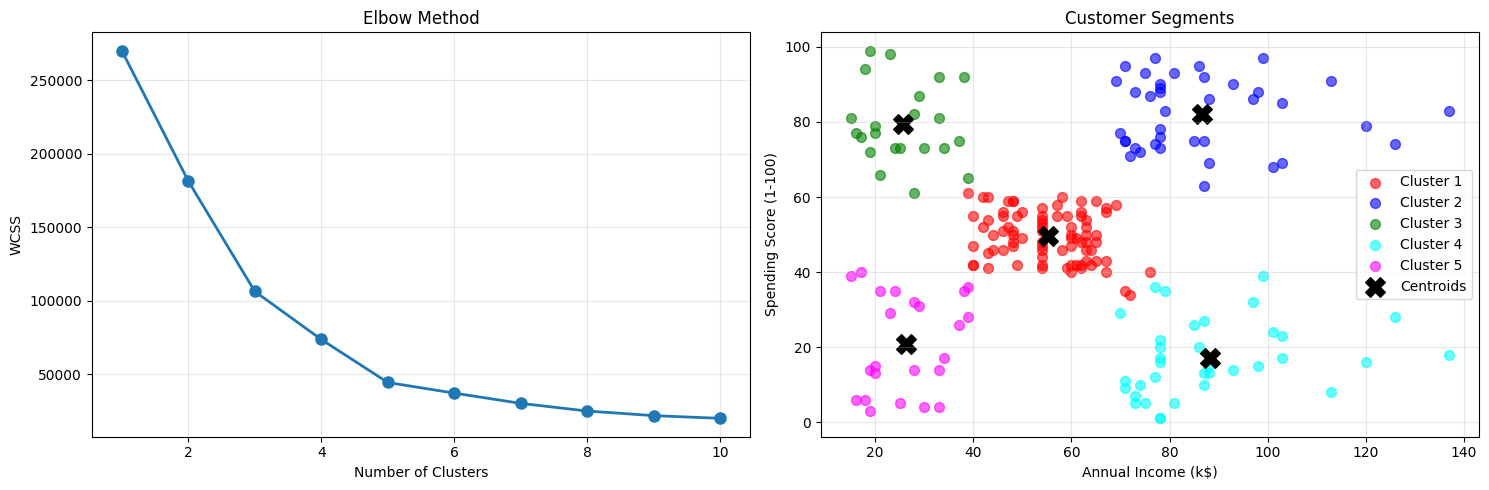

CLUSTER INTERPRETATION:
Cluster 1: Income=$55.3k, Spending=49.5
  -> Medium Income, Medium Spending (Average Customers)
Cluster 2: Income=$86.5k, Spending=82.1
  -> High Income, High Spending (Premium Customers)
Cluster 3: Income=$25.7k, Spending=79.4
  -> Low Income, High Spending (Impulsive Buyers)
Cluster 4: Income=$88.2k, Spending=17.1
  -> High Income, Low Spending (Careful Spenders)
Cluster 5: Income=$26.3k, Spending=20.9
  -> Low Income, Low Spending (Budget Conscious)


In [4]:
try:
    dfMall = pd.read_csv('Mall_Customers.csv')
    XQ7 = dfMall[['Annual Income (k$)', 'Spending Score (1-100)']].values
    wcss = []
    for i in range(1, 11):
        kmeans_temp = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans_temp.fit(XQ7)
        wcss.append(kmeans_temp.inertia_)
    kmeans_q7 = KMeans(n_clusters=5, random_state=42, n_init=10)
    dfMall['Cluster'] = kmeans_q7.fit_predict(XQ7)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 11), wcss, marker='o', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.grid(True, alpha=0.3)
    plt.subplot(1, 2, 2)
    colors = ['red', 'blue', 'green', 'cyan', 'magenta']
    for i in range(5):
        cluster_data = dfMall[dfMall['Cluster'] == i]
        plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
                   c=colors[i], label=f'Cluster {i+1}', s=50, alpha=0.6)
    plt.scatter(kmeans_q7.cluster_centers_[:, 0], kmeans_q7.cluster_centers_[:, 1], 
               c='black', marker='X', s=200, label='Centroids')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Customer Segments')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('q7CustomerSegmentation.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("CLUSTER INTERPRETATION:")
    for i in range(5):
        cluster_data = dfMall[dfMall['Cluster'] == i]
        avg_income = cluster_data['Annual Income (k$)'].mean()
        avg_spending = cluster_data['Spending Score (1-100)'].mean()
        print(f"Cluster {i+1}: Income=${avg_income:.1f}k, Spending={avg_spending:.1f}")
        if avg_income > 60 and avg_spending > 60:
            print(f"  -> High Income, High Spending (Premium Customers)")
        elif avg_income > 60 and avg_spending < 40:
            print(f"  -> High Income, Low Spending (Careful Spenders)")
        elif avg_income < 40 and avg_spending > 60:
            print(f"  -> Low Income, High Spending (Impulsive Buyers)")
        elif avg_income < 40 and avg_spending < 40:
            print(f"  -> Low Income, Low Spending (Budget Conscious)")
        else:
            print(f"  -> Medium Income, Medium Spending (Average Customers)")
except FileNotFoundError:
    print("Mall_Customers.csv not found. Please download from Kaggle.")